In [55]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

## Current Data
The file I've been collecting data in on a raspberry pi:

In [56]:
file = '/Users/admin/Desktop/Covidiot2.csv'

In [57]:
covid_df = pd.read_csv(file, sep='\t', usecols=['datetime', 'USA', 'Canada', 'Mexico', 'Italy', 'France', 
                                              'Germany', 'Spain', 'UK', 'Japan', 'S. Korea', 'India', 
                                              'Philippines', 'Brazil', 'Venezuela', 'Peru', 'South Africa', 
                                              'Egypt', 'Nigeria', 'Ethiopia', 'Iran', 'Israel', 'Australia'])

### Datetime
Coverts the datetime to a workable format within Pandas

In [58]:
covid_df['datetime'] = pd.to_datetime(covid_df['datetime'])
covid_df = covid_df.set_index('datetime')

Removes some countries with a discrepancy in rate when the sources were changed

In [59]:
covid_df = covid_df.drop(['France', 'Spain', 'UK'], axis=1)
covid_df.tail()

,USA,Canada,Mexico,Italy,Germany,Japan,S. Korea,India,Philippines,Brazil,Venezuela,Peru,South Africa,Egypt,Nigeria,Ethiopia,Iran,Israel,Australia
datetime,,,,,,,,,,,,,,,,,,,
2020-07-06 20:18:26.082492,0.900463,0.280678,0.199211,0.399953,0.236399,0.015635,0.025624,0.050537,0.042282,0.763685,0.025211,0.927163,0.346865,0.074483,0.013928,0.005085,0.289371,0.355252,0.032922
2020-07-07 05:15:04.575527,0.904026,0.280678,0.203013,0.399953,0.236399,0.015635,0.025709,0.052149,0.042282,0.764996,0.026062,0.927163,0.346865,0.074483,0.014207,0.005085,0.289371,0.361283,0.033671
2020-07-07 17:15:04.055501,0.914938,0.280678,0.203013,0.400180,0.236746,0.015635,0.025709,0.052149,0.043687,0.773214,0.026062,0.927163,0.346865,0.074483,0.014207,0.005085,0.292510,0.361283,0.033671
2020-07-08 05:15:04.005969,0.920860,0.281261,0.207866,0.400180,0.236746,0.015635,0.025832,0.053798,0.043687,0.787853,0.026062,0.938006,0.363952,0.075516,0.014207,0.005085,0.292510,0.361283,0.034333
2020-07-08 17:15:03.981648,0.929620,0.281825,0.207866,0.400499,0.237028,0.015951,0.025832,0.053798,0.045956,0.805968,0.027054,0.949025,0.363952,0.075516,0.014451,0.005085,0.295714,0.377955,0.034098


### Maximum
Since the axis is always changing (the rate is constantly increasing!!!) a maximum can be set to keep the data in the pyplot range

In [60]:
max_vals = covid_df.max().tolist()
maximum = sorted(max_vals[1:len(max_vals)], reverse=True)[0] + .05
maximum

0.9990246176719666

## Graphing covid rate in pyplot

<function matplotlib.pyplot.show(*args, **kw)>

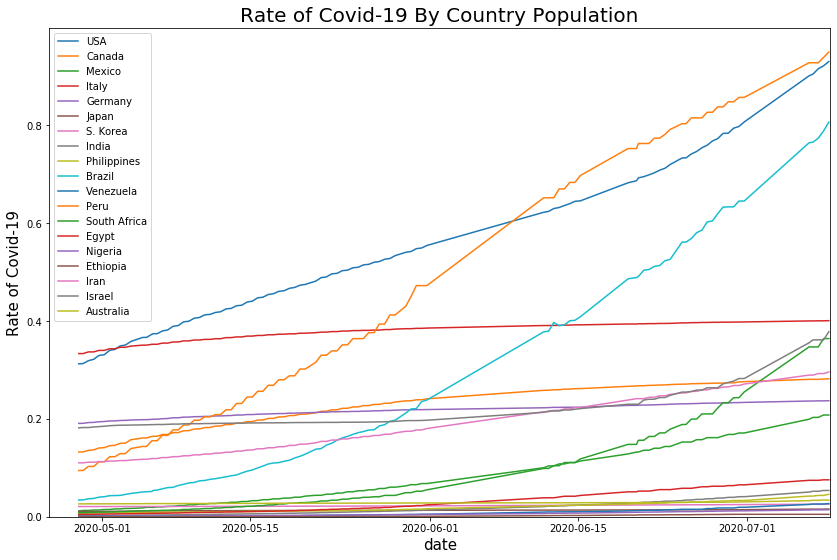

In [61]:
plt.figure(figsize=(14,9))

plt.plot(covid_df.index, covid_df.loc[:, 'USA': 'Australia'])
plt.legend(covid_df.columns, loc='upper left')
plt.ylabel('Rate of Covid-19', fontsize=15)
plt.xlabel('date', fontsize=15)
plt.title('Rate of Covid-19 By Country Population', fontsize=20)
plt.axis([pd.to_datetime('2020-04-26'), datetime.now(), 0, maximum])
plt.show